# **МОНИТОРИНГ и АНАЛИЗ ПОЛЬЗОВАТЕЛЬСКИХ ОТЗЫВОВ**

# **I. Импорт библиотек и загрузка файла**

## 1. Установка библиотеки

In [22]:
# Для работы с текстами с возможностью анализа их с помощью TextBlob, устанавливааем библиотеку для анализа ТОНАЛЬНОСТИ
!pip install textblob


In [23]:
# Шаг 1: Устанавливаем библиотеку WordCloud для создания  ОБЛАКО СЛОВ
!pip install wordcloud

In [25]:
# Установка необходимых библиотек
import pandas as pd                  # Pandas - библиотека для работы с данными в таблицах, предоставляет удобные структуры данных (например, DataFrame), которые упрощают анализ и обработку данных.
import matplotlib.pyplot as plt      # Matplotlib - используется для визуализации данных. В данном случае plt - это объект, с помощью которого строятся графики.
from textblob import TextBlob        # TextBlob - библиотека для анализа текста, включая извлечение тональности, исправление орфографических ошибок, а также работу с переводами.
from wordcloud import WordCloud      # WordCloud - библиотека для создания облаков слов, визуализирующих наиболее часто встречающиеся слова в текстах.
from collections import Counter      # Counter - специальная коллекция для подсчета количества объектов, используется для подсчета частоты слов и биграмм.
import re                            # re — встроенная библиотека Python для работы с регулярными выражениями. Используется для поиска и замены паттернов в строках, например, для очистки текста.
from IPython.display import display  # display - используется для отображения объектов в Jupyter или Google Colab, позволяет выводить более сложные объекты, такие как таблицы или графики.
import spacy                         # spacy - библиотека для обработки естественного языка, предоставляет инструменты для лемматизации, выделения сущностей и других задач по анализу текста.


## 2. Чтение CSV-файла c Google диска

In [30]:
# Загружаем данные файла netflix_users_data.csv
df = pd.read_csv('/content/drive/MyDrive/ПОРТФОЛИО/портфолио Метрики/Анализ пользовательских отзывов/feedback01.csv')

# Выводим список колонок в DataFrame, чтобы увидеть их названия
print("Названия колонок в DataFrame:", df.columns)

# Проверим первые 5 строк для общего понимания структуры данных
df.head()

Названия колонок в DataFrame: Index(['feedback'], dtype='object')


,feedback
0,"1. ""I love using Alice for setting reminders a..."
1,"2. ""The sound quality is impressive for its si..."
2,"3. ""Sometimes Alice doesn’t understand my comm..."
3,"4. ""Controlling smart home devices through voi..."
4,"5. ""Alice often struggles with playing specifi..."


# **II. Анализ тональности отзывов**

## 1. Анализ тональности текстов с помощью TextBlob

In [32]:
# Функция для анализа тональности текста
def analyze_sentiment(text):
    # Проверяем, что значение является строкой
    if isinstance(text, str):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        # Определяем тональность и переводим на русский
        if polarity > 0:
            return 'Позитивный'
        elif polarity < 0:
            return 'Негативный'
        else:
            return 'Нейтральный'
    else:
        return 'Неизвестно'

# Замените 'feedback' на фактическое название колонки с отзывами в вашем DataFrame
review_column = 'feedback'

# Проверяем, существует ли указанная колонка в DataFrame
if review_column not in df.columns:
    raise ValueError(f"Колонка '{review_column}' не найдена в DataFrame!")

# Применяем функцию ко всем отзывам в колонке
df['Тональность'] = df[review_column].apply(analyze_sentiment)

# Просмотр первых строк данных с результатами анализа
df.head()


,feedback,Тональность
0,"1. ""I love using Alice for setting reminders a...",Позитивный
1,"2. ""The sound quality is impressive for its si...",Позитивный
2,"3. ""Sometimes Alice doesn’t understand my comm...",Нейтральный
3,"4. ""Controlling smart home devices through voi...",Позитивный
4,"5. ""Alice often struggles with playing specifi...",Нейтральный


## 2. Сохранение результатов в CSV-файл

In [35]:
!ls  # Список файлов в текущей директории


drive  sample_data  sentiment_analysis_results02.csv  sentiment_analysis_results.csv


In [36]:
from google.colab import files

# Убедитесь, что DataFrame df существует
if 'df' in locals() or 'df' in globals():
    # Сохранение результатов в CSV-файл
    output_filename = 'sentiment_analysis_results.csv'
    df.to_csv(output_filename, index=False)

    # Проверка наличия файла
    !ls  # Убедитесь, что файл создан

    # Загрузка файла для скачивания
    files.download(output_filename)
else:
    print("Ошибка: DataFrame 'df' не найден. Убедитесь, что данные созданы.")

drive  sample_data  sentiment_analysis_results02.csv  sentiment_analysis_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Построение гистограммы распределения тональности

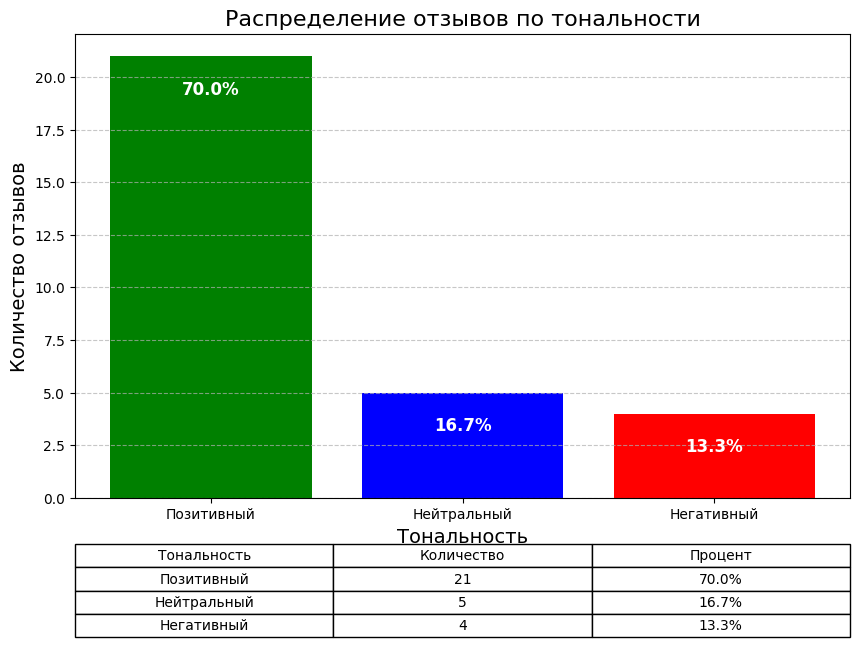

In [37]:
# Подсчет количества отзывов каждой категории
sentiment_counts = df['Тональность'].value_counts()
percentages = (sentiment_counts / len(df)) * 100

# Создаем DataFrame для статистической таблицы
import pandas as pd
stats_table = pd.DataFrame({
    'Тональность': sentiment_counts.index,
    'Количество': sentiment_counts.values,
    'Процент': [f'{p:.1f}%' for p in percentages]
})

# Построение гистограммы
plt.figure(figsize=(10, 8))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])

# Добавляем подписи в процентах над всеми столбцами
for bar, percent in zip(bars, percentages):
    y_position = bar.get_height() - 2  # Размещаем текст ниже верхнего края столбца
    plt.text(bar.get_x() + bar.get_width() / 2, y_position,
             f'{percent:.1f}%', ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Настройки графика
plt.title('Распределение отзывов по тональности', fontsize=16)
plt.xlabel('Тональность', fontsize=14)
plt.ylabel('Количество отзывов', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем таблицу под графиком
table_data = stats_table.values
col_labels = ['Тональность', 'Количество', 'Процент']
plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

# Смещаем график вверх, чтобы освободить место для таблицы
plt.subplots_adjust(bottom=0.3)

# Отображаем график
plt.show()

# Добавляем таблицу над графиком
#table_data = stats_table.values
#col_labels = ['Тональность', 'Количество', 'Процент']
#plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='top', fontsize=12)

# Смещаем график вниз, чтобы таблица не перекрывала его
#plt.subplots_adjust(top=0.8)

# Отображаем график
#plt.show()


**Вывод:**

---
Из 30 проанализированных отзывов на Яндекс.Станцию ​​21 отзыв был положительным , 5 — нейтральными и 4 — отрицательными . Это свидетельствует о в целом положительном восприятии устройства среди пользователей, с небольшим числом негативных отзывов, что может свидетельствовать о том, что функционал в основном обеспечивает пользу их пользователю.


# **III. Получение ключевых слов**

**Путь решения:**

**Анализ темы :** Классифицировать данные по темам, используя такие частные слова, как «музыка», «голос» и «команда».

увидеть  **Облако слов :** Предварительный просмотр поможет увидеть наиболее важные слова, встречающиеся в отзывах.

**Биграммы :** Можно увидеть не только словарные слова, но и их сочетания, которые могут дать более глубокое понимание отзывов.

## 1: Проверяем загруженные данные (df)

In [38]:
# df — это ваш DataFrame, загруженный ранее. Убедитесь, что колонка с отзывами называется 'Отзыв'.
df.head()

,feedback,Тональность
0,"1. ""I love using Alice for setting reminders a...",Позитивный
1,"2. ""The sound quality is impressive for its si...",Позитивный
2,"3. ""Sometimes Alice doesn’t understand my comm...",Нейтральный
3,"4. ""Controlling smart home devices through voi...",Позитивный
4,"5. ""Alice often struggles with playing specifi...",Нейтральный


## 2: Объединяем все тексты отзывов в одну строку, очистим текст

In [39]:
# Загружаем модель для английского языка
# Загрузка моделей для английского языка позволяет выполнять необходимые операции обработки текста,
# такие как токенизация и лемматизация, что, в свою очередь, улучшает анализ данных
nlp = spacy.load("en_core_web_sm")

# Обновляем список стоп-слов с английскими и русскими словами
stopwords = set([
    "и", "в", "на", "с", "по", "это", "что", "как", "из", "для", "а", "не", "до", "о", "от",
    "же", "но", "за", "бы", "я", "вы", "он", "она", "они", "мы", "его", "ее", "их", "the", "for",
    "is", "and", "it", "to", "of", "a", "with", "on", "but", "in", "this", "that", "was", "i", "you",
    "its", "my", "sometimes", "be", " ", "I", "not"
])

# Проверка данных
if 'feedback' not in df.columns:
    raise ValueError("Колонка 'feedback' не найдена в DataFrame. Проверьте название колонки!")

# Объединяем все отзывы в одну строку
all_reviews = " ".join(review for review in df['feedback'] if isinstance(review, str))

# Очищаем текст от цифр и специальных символов, оставляя латиницу и кириллицу
cleaned_text = re.sub(r'[^a-zA-Zа-яА-Я\s]', '', all_reviews.lower())

# Лемматизация текста
doc = nlp(cleaned_text)

# Дополнительный фильтр стоп-слов
stopwords.update(["could", "not", "well", "when", "is"])

# Оставляем только лемматизированные слова, исключая стоп-слова
lemmatized_words = [token.lemma_ for token in doc if token.lemma_ not in stopwords]

# Подсчитываем частоту каждого слова
word_counts = Counter(lemmatized_words)

# Топ-10 самых частых слов
most_common_words = word_counts.most_common(10)
print("Топ-10 самых частых слов с лемматизацией:")
for word, count in most_common_words:
    print(f"{word}: {count} раз(а)")

# Создаем DataFrame для таблицы
common_words_df = pd.DataFrame(most_common_words, columns=['Слово', 'Частота'])

# Проверяем данные в DataFrame
if common_words_df.empty:
    print("Таблица пуста. Проверьте исходные данные.")
else:
    # Выводим таблицу
    display(common_words_df)


Топ-10 самых частых слов с лемматизацией:
alice: 10 раз(а)
especially: 6 раз(а)
music: 5 раз(а)
voice: 4 раз(а)
play: 4 раз(а)
service: 4 раз(а)
great: 4 раз(а)
love: 3 раз(а)
use: 3 раз(а)
command: 3 раз(а)


,Слово,Частота
0,alice,10
1,especially,6
2,music,5
3,voice,4
4,play,4
5,service,4
6,great,4
7,love,3
8,use,3
9,command,3


**Вывод:  Топ-10 самых счастливых слов:**
- алиса (10 раз)
-  особенно (6 раз)
- музыка (5 раз)
- голос (4 раза)
- играть (4 раза)
- обслуживание (4 раза)
- отлично (4 раза)
- любовь (3 раза)
- использовать (3 раза)
-  команда (3 раза)

## 3: Построение облаков слов

In [41]:
from collections import Counter
word_counts = Counter(cleaned_text.split())  # Подсчет всех слов
word_counts_filtered = {word: count for word, count in word_counts.items() if count > 1}  # Фильтрация редких слов


In [42]:
from collections import Counter

# Предполагается, что cleaned_text уже содержит очищенный текст
word_counts = Counter(cleaned_text.split())
word_counts_filtered = {word: count for word, count in word_counts.items() if count > 1}  # Оставляем слова с частотой > 1

In [43]:
# Пример восстановления word_counts_filtered
from collections import Counter
word_counts = Counter(cleaned_text.split())  # Подсчет слов
word_counts_filtered = dict(word_counts)    # Преобраз


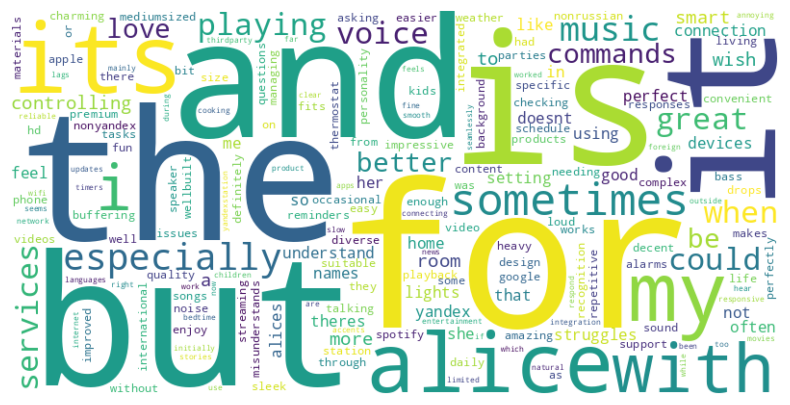

In [44]:
# Генерация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_filtered)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.show()


## 4: Анализ биграммы (двухсловных фраз)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Собираем все тексты обратно в один большой текст
all_reviews_text = " ".join(df['feedback'])

# Инициализируем векторизатор для биграмм
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Применяем векторизатор к нашим данным
bigrams = vectorizer.fit_transform([all_reviews_text])

# Получаем биграммы с их частотой
bigram_counts = bigrams.sum(axis=0).A1
bigram_grams = vectorizer.get_feature_names_out()

# Составляем таблицу с биграммами
bigram_freq = list(zip(bigram_grams, bigram_counts))

# Сортируем по частоте
sorted_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

# Топ-10 биграмм
print("Топ-10 самых частых биграмм:")
for bigram, count in sorted_bigrams[:10]:
    print(f"{bigram}: {count} раз(а)")

# Отображаем результат в виде таблицы
bigram_df = pd.DataFrame(sorted_bigrams[:10], columns=['Биграмма', 'Частота'])
display(bigram_df)


Топ-10 самых частых биграмм:
yandex services: 3 раз(а)
alice struggles: 2 раз(а)
controlling smart: 2 раз(а)
especially non: 2 раз(а)
home devices: 2 раз(а)
love using: 2 раз(а)
playing music: 2 раз(а)
smart home: 2 раз(а)
10 connection: 1 раз(а)
11 kids: 1 раз(а)


,Биграмма,Частота
0,yandex services,3
1,alice struggles,2
2,controlling smart,2
3,especially non,2
4,home devices,2
5,love using,2
6,playing music,2
7,smart home,2
8,10 connection,1
9,11 kids,1


**Топ-10 самых частых биграмм:**
1. **yandex services** (3 раза)
2. **alice struggles** (2 раза)
3. **controlling smart** (2 раза)
4. **especially non** (2 раза)
5. **home devices** (2 раза)
6. **love using** (2 раза)
7. **playing music** (2 раза)
8. **smart home** (2 раза)
9. **10 connection** (1 раз)
10. **11 kids** (1 раз)



# **IV. Анализ и рекомендации**

---



1. **Позитивное восприятие**:
   - Большинство пользователей выражают положительные эмоции при использовании Яндекс.Станции. Среди топовых слов и биграмм выделяются такие, как **"love"**, **"great"**, **"command"**, что подтверждает удовлетворение пользователей.
   - Описание таких функциональностей, как управление умным домом (**"smart home"**) и воспроизведение музыки (**"music"**, **"playing music"**) также говорит о положительном восприятии этих аспектов устройства.

2. **Негативные и нейтральные отзывы**:
   - Несмотря на преобладание позитивных отзывов, в негативных отзывах часто упоминаются проблемы с точностью распознавания команд (**"struggles"**, **"especially non"**), а также недостатки в функциональности, такие как сложности с воспроизведением контента или работе с определенными сервисами.
   - Это также поддерживается в биграммах, где встречаются выражения типа **"alice struggles"** и **"especially non"**, указывающие на технические ограничения.

3. **Рекомендации**:
   - **Улучшение распознавания речи** и **оптимизация работы с иностранными именами** остаются важными аспектами для улучшения пользовательского опыта, чтобы уменьшить количество негативных отзывов.
   - Несмотря на это, положительная реакция большинства пользователей говорит о высоком потенциале устройства в области умного дома и голосового управления, и это стоит активно развивать.

**Заключение**: Яндекс.Станция в целом получает положительные отзывы от пользователей, с преобладанием позитивных откликов. Основные проблемы связаны с точностью распознавания команд и техническими ограничениями, что может быть областью для улучшения в будущих обновлениях.